In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import re 
%matplotlib inline
import seaborn

In [2]:
ls ptb/

BUILD                       reader.py
__init__.py                 reader_test.py
__pycache__/                reader_words.py
black_hole_outputs.csv      rnn_cell.py
blackholes.train2.txt       runs/
blackholes_word_lm.py       shuffle.py
blackholes_word_lm_ver2.py  test_outputs.csv
data/                       training_loss_32window.csv
data_full/                  valid_loss_32window.csv
extract_outputs.py          visualize.py
pre-process.py              word_outputs.csv
ptb_word_lm.py


In [4]:
valid_loss = pd.read_csv("ptb/valid_loss_32window.csv", index_col = False)
valid_loss.head()

,Wall time,Step,Value
0,1481804386,0,920.307617
1,1481804506,64,507.240173
2,1481804626,137,526.775879
3,1481804745,209,554.669312
4,1481804866,281,440.223968


In [6]:
train_loss = pd.read_csv("ptb/training_loss_32window.csv", index_col = False)
train_loss.head()

,Wall time,Step,Value
0,1481804386,0,921.592773
1,1481804506,64,522.016968
2,1481804626,137,453.009857
3,1481804745,209,497.409851
4,1481804866,281,457.303375


In [56]:
steps = list(train_loss['Step'])
steps[-7:] = range(5000,6000, 150)

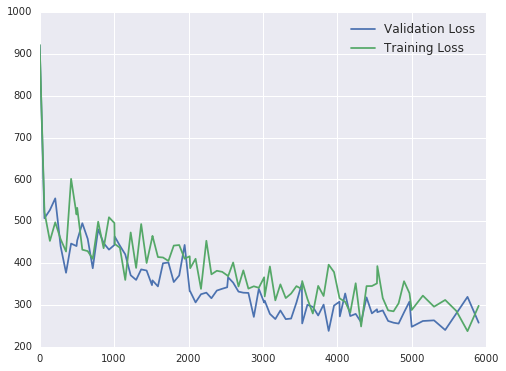

In [93]:
valid = list(valid_loss['Value'])
train = list(train_loss['Value'])
plt.figure(figsize = (8,6))
plt.plot(steps, valid, label = 'Validation Loss')
plt.plot(steps, train, label = 'Training Loss')

plt.legend(fontsize = 12)
plt.show()

In [79]:
file = open("ptb/perplexity_32window.txt", "r").readlines()
pattern_1 = "Train Perplexity: (\d+\.\d+)"
pattern_2 = "Valid Perplexity: (\d+\.\d+)"
pattern_3 = 'perplexity: (\d+\.\d+)'
dev = []
training = []
total = []
for ln in file:
    #print(ln)
    match_1 = re.search(pattern_1, ln)
    match_2 = re.search(pattern_2, ln)
    match_3 = re.search(pattern_3, ln)
    if match_1:
        training.append(match_1.group(1))
    elif match_2:
        dev.append(match_2.group(1))
    elif match_3:
        total.append(match_3.group(1))

In [80]:
print(len(training), len(dev), len(total))

10 10 100


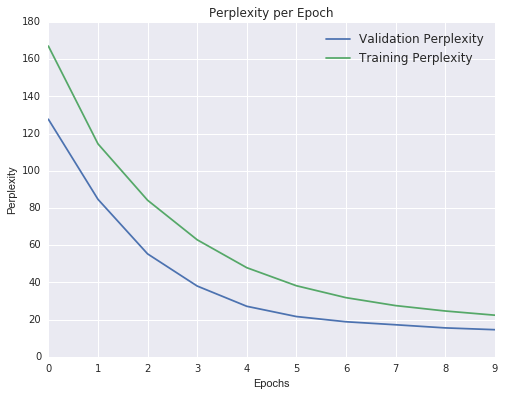

In [94]:
plt.figure(figsize = (8,6))
plt.plot(range(10), dev, label = 'Validation Perplexity')
plt.plot(range(10), training, label = 'Training Perplexity')
plt.title("Perplexity per Epoch")
plt.ylabel("Perplexity")
plt.xlabel("Epochs")
#plt.plot(range(100), total, label = 'Total Perplexity')
#plt.yscale('log')
plt.legend(fontsize = 12)
plt.show()